In [74]:
import numpy as np 
import scipy.stats as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ejercicio 1.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


Se alcanzó el número máximo de iteraciones.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.


Text(0.5, 1.0, '$\\hat{\\theta}$ vs valor de a')

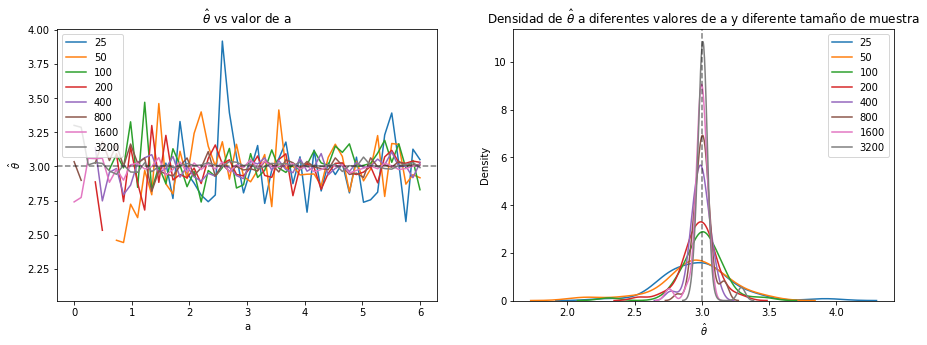

In [155]:
theta = 3
aces = np.linspace(theta-3,theta+3)
ns = [50,100,200,400,800,1600,3200]

def EM_normal(a,mu,m,n):
    # Hyperparams
    hat = mu
    tol = 1e-5 
    maxiter = 300
    i = 0
    delta = 1

    while (np.abs(delta)>tol and i < maxiter):
        hat0 = hat
        hat = mu*m/n + sc.norm.pdf(x=a-hat0)*(n-m)/(n*(1-sc.norm.cdf(x=a-hat0))) + (n-m)*hat0/n
        delta = hat-hat0
        i+=1
    if i==maxiter:
        print("Se alcanzó el número máximo de iteraciones.")
    #print(f'θ estimado: {hat:.4f}, número de iteraciones: {i}')
    return hat
fig, ax = plt.subplots(1,2,figsize=(15,5))
for n in ns:
    theta_hat = []
    for a in aces:
        x = sc.norm.rvs(loc=theta,size=n)
        #xm = x[x<a]
        #xn = x[x>=a]
        censored = x>=a
        m = n-len(x[censored])
        #n = k-m
        x[censored] = a
        xm = x[np.logical_not(censored)]
        mu_xm = np.mean(xm)
        theta_hat.append(EM_normal(a,mu_xm,m,n))
    #sns.kdeplot(x=theta_hat)
    ax[0].plot(aces,theta_hat)
    ax[1] = sns.kdeplot(x=theta_hat)
plt.legend(ns)
plt.axvline(x=theta,linestyle='--',color='k',alpha=0.5)
plt.xlabel('$\hat{\\theta}$')
plt.title('Densidad de $\hat{\\theta}$ a diferentes valores de a y diferente tamaño de muestra')
ax[0].legend(ns)
ax[0].axhline(y=theta,linestyle='--',color='k',alpha=0.5)
ax[0].set_xlabel('a')
ax[0].set_ylabel('$\hat{\\theta}$')
ax[0].set_title('$\hat{\\theta}$ vs valor de a')

Puede verse que el algoritmo $EM$, para estos datos normalmente distribuidos censurados por la derecha, es particularmente resiliente tanto a tamaño de muestra como al lugar en el que se censura la distribución normal. Por lo tanto, si se tiene una buena razón para asumir que la distribución es normal, a pesar de no poder conocerse adecuadamente los datos, puede ser un algoritmo muy valioso para encontrar los parámetros de normalidad de una población. 

## Pregunta 2.

Si la verosimilitud observada es dada por la siguiente ecuación: 
$$\mathcal{L}(\theta|\overrightarrow{x})\propto\left[\prod_{i=1}^m\phi(x_i;\theta,1)\right]\left[1-\Phi(a-\theta)\right]^{n-m}$$
Entonces, para maximizarla, derivando con respecto al parámetro $\theta$: 
$$\frac{d\mathcal{L}}{d\theta} \propto \left[\frac{d}{d\theta}\prod_{i=1}^m\phi(x_i;\theta,1)\right]\left[1-\Phi(a-\theta)\right]^{n-m} + \left[\prod_{i=1}^m\phi(x_i;\theta,1)\right]\frac{d}{d\theta}\left[1-\Phi(a-\theta)\right]^{n-m}$$
Derivando, se obtiene: 
$$\frac{d\mathcal{L}}{d\theta} \propto \left[\frac{d}{d\theta}\prod_{i=1}^m\phi(x_i;\theta,1)\right]\left[1-\Phi(a-\theta)\right]^{n-m} + (n-m)\left[\prod_{i=1}^m\phi(x_i;\theta,1)\right]\left[1-\Phi(a-\theta)\right]^{n-m-1}\phi(a-\theta)$$
Se obtiene el máximo cuando esta derivada es 0, por lo que evaluando en una $\theta^*$ tal que la derivada de la verosimilitud sea 0, puede encontrarse el máximo. Adicionalmente, se hace abuso de notación, y se anota esta $\theta^*$ hasta llegar al resultado final. Continuando con la igualdad: 
$$\begin{gather*}
0=\left[\frac{d}{d\theta}\prod_{i=1}^m\phi(x_i;\theta,1)\right]\left[1-\Phi(a-\theta)\right]^{n-m} + (n-m)\left[\prod_{i=1}^m\phi(x_i;\theta,1)\right]\left[1-\Phi(a-\theta)\right]^{n-m-1}\phi(a-\theta)\\
-\left[\frac{d}{d\theta}\prod_{i=1}^m\phi(x_i;\theta,1)\right]\left[1-\Phi(a-\theta)\right]^{n-m} = (n-m)\left[\prod_{i=1}^m\phi(x_i;\theta,1)\right]\left[1-\Phi(a-\theta)\right]^{n-m-1}\phi(a-\theta) \\
-\left[\frac{d}{d\theta}\prod_{i=1}^m\phi(x_i;\theta,1)\right]= (n-m)\left[\prod_{i=1}^m\phi(x_i;\theta,1)\right]\left[1-\Phi(a-\theta)\right]^{n-m-1}\left[1-\Phi(a-\theta)\right]^{m-n} \phi(a-\theta) \\
-\left[\frac{d}{d\theta}\prod_{i=1}^m\phi(x_i;\theta,1)\right]= (n-m)\left[\prod_{i=1}^m\phi(x_i;\theta,1)\right]\frac{\phi(a-\theta)}{1-\Phi(a-\theta)}
\end{gather*}$$
Evaluando la derivada se obtiene lo siguiente: 
$$\begin{gather*}

\frac{d}{d\theta}\prod_{i=1}^m\phi(x_i;\theta,1)= \sum_{i=1}^{m}\left[ \phi(x_i;\theta,1)'\underset{i\ne j}{\prod_{j=1}^{m}}\phi(x_j;\theta,1) \right]
\end{gather*}$$
Donde la comilla denota la primera derivada. Entonces, sustituyendo en nuestra ecuación: 
$$\begin{align*}
-\sum_{i=1}^{m}\left[ \phi(x_i;\theta,1)'\underset{i\ne j}{\prod_{j=1}^{m}}\phi(x_j;\theta,1) \right] &= (n-m)\left[\prod_{i=1}^m\phi(x_i;\theta,1)\right]\frac{\phi(a-\theta)}{1-\Phi(a-\theta)} \\ 
-\frac{\sum_{i=1}^{m}\left[ \phi(x_i;\theta,1)'\underset{i\ne j}{\prod_{j=1}^{m}}\phi(x_j;\theta,1) \right]}{\prod_{i=1}^m\phi(x_i;\theta,1)} &= (n-m)\frac{\phi(a-\theta)}{1-\Phi(a-\theta)} 
\end{align*}$$
Siendo más explícitos con la productoria, que puede ser descrita de la siguiente manera: 

$$\prod_{i=1}^m\phi(x_i;\theta,1) = \phi(x_i;\theta,1)\underset{i\ne j}{\prod_{j=1}^{m}}\phi(x_j;\theta,1)$$
Se utiliza esto para cuando se haga la sumatoria para cada elemento $i$, con el fin de facilitar el álgebra. Entonces, retornando a la ecuación: 
$$\begin{align*}

-\frac{\sum_{i=1}^{m}\left[ \phi(x_i;\theta,1)'\underset{i\ne j}{\prod_{j=1}^{m}}\phi(x_j;\theta,1) \right]}{\phi(x_i;\theta,1)\underset{i\ne j}{\prod_{j=1}^{m}}\phi(x_j;\theta,1)} &= (n-m)\frac{\phi(a-\theta)}{1-\Phi(a-\theta)} \\
-\sum_{i=1}^{m}\frac{\phi(x_i;\theta,1)'}{\phi(x_i;\theta,1)} &=(n-m) \frac{\phi(a-\theta)}{1-\Phi(a-\theta)} 
\end{align*}$$

Vale la pena recordar que la derivada para cada elemento $i$ puede calcularse de la siguiente manera: 
$$\begin{align*}
\frac{d}{d\theta}\phi(x_i;\theta,1) &= \frac{d}{d\theta}\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{(x_i-\theta)^2}{2}\right) \\

&= -\frac{1}{\sqrt{2\pi}}\exp\left(\frac{(x_i-\theta)^2}{2}\right)(x_i-\theta)(-1) \\
&= -\frac{1}{\sqrt{2\pi}}\exp\left(\frac{(x_i-\theta)^2}{2}\right)(\theta-x_i) \\
&= -\phi(x_i;\theta,1)(\theta-x_i)
\end{align*}$$

Entonces, retornando a la ecuación: 

$$\begin{align*}

-\sum_{i=1}^{m}\frac{\phi(x_i;\theta,1)'}{\phi(x_i;\theta,1)} &=(n-m) \frac{\phi(a-\theta)}{1-\Phi(a-\theta)} \\
-\sum_{i=1}^{m}\frac{-\phi(x_i;\theta,1)(\theta-x_i)}{\phi(x_i;\theta,1)} &=(n-m) \frac{\phi(a-\theta)}{1-\Phi(a-\theta)} \\
\sum_{i=1}^{m}(\theta-x_i) &= (n-m) \frac{\phi(a-\theta)}{1-\Phi(a-\theta)} \\
m\theta &= \sum_{i=1}^{m}x_i + (n-m) \frac{\phi(a-\theta)}{1-\Phi(a-\theta)} \\
\theta &= \frac{\sum_{i=1}^{m}x_i}{m} + \frac{n-m}{m} \frac{\phi(a-\theta)}{1-\Phi(a-\theta)} \\
\theta^* &=\bar{x}_{\text{obs}} + \frac{n-m}{m} \frac{\phi(a-\theta^*)}{1-\Phi(a-\theta^*)}

\end{align*}$$
Y con esto se llega al resultado esperado, y concluye la demostración. $\blacksquare$

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:250: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C
/var/folders/bh/tbkbc3qx5gvcp228jqgbmqfc0000gn/T/ipykernel_9545/3460605151.py:14: RuntimeWarning: overflow encountered in double_scalars
  hat = mu + sc.norm.pdf(x=a-hat0)*(n-m)/(n*(1-sc.norm.cdf(x=a-hat0))) + (n-m)*hat0/m
/var/folders/bh/tbkbc3qx5gvcp228jqgbmqfc0000gn/T/ipykernel_9545/3460605151.py:15: RuntimeWarning: invalid value encountered in double_scalars
  delta = hat-hat0


Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:250: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C
/var/folders/bh/tbkbc3qx5gvcp228jqgbmqfc0000gn/T/ipykernel_9545/3460605151.py:14: RuntimeWarning: overflow encountered in double_scalars
  hat = mu + sc.norm.pdf(x=a-hat0)*(n-m)/(n*(1-sc.norm.cdf(x=a-hat0))) + (n-m)*hat0/m
/var/folders/bh/tbkbc3qx5gvcp228jqgbmqfc0000gn/T/ipykernel_9545/3460605151.py:15: RuntimeWarning: invalid value encountered in double_scalars
  delta = hat-hat0


Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:250: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C
/var/folders/bh/tbkbc3qx5gvcp228jqgbmqfc0000gn/T/ipykernel_9545/3460605151.py:14: RuntimeWarning: overflow encountered in double_scalars
  hat = mu + sc.norm.pdf(x=a-hat0)*(n-m)/(n*(1-sc.norm.cdf(x=a-hat0))) + (n-m)*hat0/m
/var/folders/bh/tbkbc3qx5gvcp228jqgbmqfc0000gn/T/ipykernel_9545/3460605151.py:15: RuntimeWarning: invalid value encountered in double_scalars
  delta = hat-hat0


Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:250: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C
/var/folders/bh/tbkbc3qx5gvcp228jqgbmqfc0000gn/T/ipykernel_9545/3460605151.py:14: RuntimeWarning: overflow encountered in double_scalars
  hat = mu + sc.norm.pdf(x=a-hat0)*(n-m)/(n*(1-sc.norm.cdf(x=a-hat0))) + (n-m)*hat0/m
/var/folders/bh/tbkbc3qx5gvcp228jqgbmqfc0000gn/T/ipykernel_9545/3460605151.py:15: RuntimeWarning: invalid value encountered in double_scalars
  delta = hat-hat0


Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:250: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C
/var/folders/bh/tbkbc3qx5gvcp228jqgbmqfc0000gn/T/ipykernel_9545/3460605151.py:14: RuntimeWarning: overflow encountered in double_scalars
  hat = mu + sc.norm.pdf(x=a-hat0)*(n-m)/(n*(1-sc.norm.cdf(x=a-hat0))) + (n-m)*hat0/m
/var/folders/bh/tbkbc3qx5gvcp228jqgbmqfc0000gn/T/ipykernel_9545/3460605151.py:15: RuntimeWarning: invalid value encountered in double_scalars
  delta = hat-hat0


Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.
Se alcanzó el número máximo de iteraciones.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


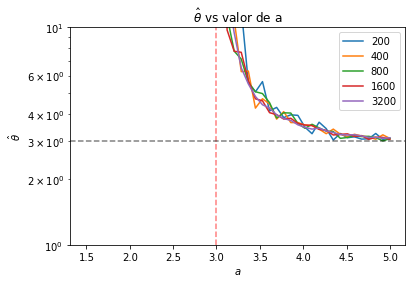

In [156]:
theta = 3
ns = [200,400,800,1600,3200]
aces = np.linspace(theta-2,theta+2)
def L_normal(a,mu,m,n):
    # Hyperparams
    hat = mu
    tol = 1e-5 
    maxiter = 300
    i = 0
    delta = 1

    while (np.abs(delta)>tol and i < maxiter):
        hat0 = hat
        hat = mu + sc.norm.pdf(x=a-hat0)*(n-m)/(n*(1-sc.norm.cdf(x=a-hat0))) + (n-m)*hat0/m
        delta = hat-hat0
        i+=1
    if i==maxiter:
        print("Se alcanzó el número máximo de iteraciones.")
    #print(f'θ estimado: {hat:.4f}, número de iteraciones: {i}')
    return hat

def run_iterations(ns,theta,aces):
    for n in ns:
        theta_hat = []
        for a in aces:
            x = sc.norm.rvs(loc=theta,size=n)
            #xm = x[x<a]
            #xn = x[x>=a]
            censored = x>=a
            m = n-len(x[censored])
            #n = k-m
            x[censored] = a
            xm = x[np.logical_not(censored)]
            mu_xm = np.mean(xm)
            theta_hat.append(L_normal(a,mu_xm,m,n))
        plt.plot(aces,theta_hat)
    plt.legend(ns)
    plt.yscale('log')
    plt.axvline(x=theta,linestyle='--',color='red',alpha=0.5,label='$\\theta$')
    plt.axhline(y=theta,linestyle='--',color='k',alpha=0.5)
    #plt.ylim(bottom=0,top=14)
    plt.xlabel('$a$')
    plt.ylabel('$\hat{\\theta}$')
    plt.title('$\hat{\\theta}$ vs valor de a')

run_iterations(ns,theta,aces)

A comparación con el algoritmo $EM$, puede observarse que este algoritmo no converge en lo absoluto cuando $a<\theta$, aunque el $EM$ sí lo logre. Requiere que la censura sea algo mayor que la media para que el estimador se aproxime al valor real. Esto quiere decir que la aproximación no es muy buena, porque conforme crece el número de valores observados, entonces el segundo término de la ecuación tiende a 0, por lo que tiende a tener una menor importancia, y cuando son más valores censurados, el algoritmo da terribles predicciones de la media de la población, por lo que resulta mucho más efectivo el algoritmo $EM$.

## Ejercicio 3
Sea $X\sim \text{Exp}(\theta)$, donde $\theta$ representa el valor esperado. Sean $x_1,...,x_m$ los datos observados y $x_{m+1}>a,...,x_n>a$ los datos censurados por la derecha. La verosimilitud de esta distribución es la siguiente: 

$$ f(x|\theta) = \frac{1}{\theta}\exp(-\frac{x}{\theta})$$
Y su logverosimilitud: 
$$\mathcal{L}(\theta;x) = \log f(x|\theta) = \log\frac{1}{\theta} - \frac{x}{\theta }$$
Tomando todos los datos obtenidos, entonces se obtiene que: 
$$ \log f\left(\overrightarrow{x}|\theta\right) = \sum_{i=1^n}\log\frac{1}{\theta} - \frac{1}{\theta}\sum_{i=1}^n x_i$$
Y separándose en los valores observados y no observados: 
$$ \log f\left(\overrightarrow{x}|\theta\right) = n\log\frac{1}{\theta} - \frac{1}{\theta}\left(\sum_{i=1}^m x_i+\sum_{i=m+1}^n x_i\right)$$
Tomando el valor esperado: 
$$ \begin{align*} Q(\theta|\theta^{(0)}) &= n\log\frac{1}{\theta} - \frac{1}{\theta}\mathbb{E}_{X\sim\text{Exp}(\theta^{(0)})}\left(\sum_{i=1}^m x_i+\sum_{i=m+1}^n x_i\right) \\
&= n\log\frac{1}{\theta} - \frac{1}{\theta}\sum_{i=1}^m x_i-\frac{1}{\theta}\mathbb{E}_{X\sim\text{Exp}(\theta^{(0)})}\left(\sum_{i=m+1}^n x_i\right) \\
&= -n\log{\theta} - \frac{1}{\theta}\sum_{i=1}^m x_i-\frac{1}{\theta}\mathbb{E}_{X\sim\text{Exp}(\theta^{(0)})}\left(\sum_{i=m+1}^n x_i\right)
\end{align*}$$

Se sabe que los datos censurados son mayores que $a$. Entonces, la probabilidad de que sean mayores estos datos es la siguiente: 
$$\begin{align*}
P(X>a)  &= \int_{a}^\infty \frac{1}{\theta}\exp\left(-\frac{1}{\theta} x\right) dx\\
        &= \left.-\exp{\left(-\frac{1}{\theta} x\right)}\right|_a^\infty \\
        &= \exp{\left(-\frac{1}{\theta} a\right)} \\
        &= \theta f(a|\theta)
\end{align*}$$

Para conocer el valor esperado de los datos censurados, se sabe que vienen de una distribución normal truncada con soporte en $[a,\infty)$ y con tasa de $\frac{1}{\theta}$. Es decir: 
$$\mathbb{E}(X_i|Y_i) = \theta + \frac{\mathbb{1}_{[a,\infty)}a\thetaf(a|\theta)}{\theta f(a|\theta)}$$
$$\omega_\theta = \theta + a$$

Y con esto se calcula el valor esperado. Se toma para el algoritmo EM la estimación con el último valor de $\theta$ Haciendo esta consideración, entonces, calculando la derivada, y evaluando en el siguiente punto ($\theta^{(1)}$):  
$$ \begin{align*} \frac{d}{d\theta}Q(\theta|\theta^{(0)}) 
&= \frac{d}{d\theta}\left(-n\log{\theta} - \frac{1}{\theta}\sum_{i=1}^m x_i-\frac{1}{\theta}\mathbb{E}_{X\sim\text{Exp}(\theta^{(0)})}\left(\sum_{i=m+1}^n x_i\right)\right) \\
0 &= -\frac{n}{\theta^{(1)}} + \frac{1}{{\theta^{(1)}}^2}\sum_{i=1}^m x_i+\frac{1}{{\theta^{(1)}}^2}\mathbb{E}_{X\sim\text{Exp}(\theta^{(0)})}\left(\sum_{i=m+1}^n x_i\right) \\
n\theta^{(1)} &= \sum_{i=1}^m x_i+ \mathbb{E}_{X\sim\text{Exp}(\theta^{(0)})}\left(\sum_{i=m+1}^n x_i\right)  \\
n\theta^{(1)}  &= \sum_{i=1}^m x_i+ (n-m)\omega_{\theta^{(0)}} \\
\theta^{(1)}  &= \frac{1}{n}\sum_{i=1}^m x_i+ \frac{n-m}{n}\omega_{\theta^{(0)}} \\
\theta^{(1)}  &= \frac{1}{n}\sum_{i=1}^m x_i+ \frac{n-m}{n}(\theta^{(0)}+a)
\end{align*}$$



Y su valor esperado es el siguiente: 
$$\begin{align*}
\mathbb{E}_{X\sim \text{Exp}(\theta)} &= \int_{a}^\infty \frac{x}{\theta}\exp\left(-\frac{1}{\theta} x\right)dx \\
                &= \theta\left[-\theta x\exp{\left(-\frac{1}{\theta}x\right)}\right]_{a}^\infty - \frac{1}{\theta}\int_{a}^{\infty} - \theta\exp{\left(-\frac{1}{\theta} x\right)} dx \\
                &= \left[-x\exp{\left(-\frac{1}{\theta} x\right)}- \theta\exp{\left(-\frac{1}{\theta}x\right)} \right]_{a}^\infty \\
                &= \theta{\left(\frac{a}{\theta}+1\right)\exp\left(-\frac{a}{\theta}\right)} \\
                &= {\left(a+\theta\right)\exp\left(-\frac{a}{\theta}\right)}
\end{align*}$$

Y con esto se llega al resultado esperado. 

Calculando el valor esperado de la logverosimilitud de los datos censurados: 
$$\begin{align*}
\mathbb{E}_{X>a} &= \int_{a}^\infty \theta\log\left(\frac{1}{\theta}\exp\left(-\frac{x}{\theta}\right)\right)d\theta \\
&= \int_{a}^\infty (-\theta\log(\theta)-\theta\frac{x}{\theta} )d\theta \\
&= \int_{a}^\infty (-\theta\log(\theta)-x )d\theta 
\end{align*}$$

[5.83455700e+00 1.48311749e+00 2.37777294e+00 9.41553105e-01
 4.56166639e+00 3.88169314e+00 2.02117122e+00 6.32380569e-01
 1.45692538e+00 5.68620649e+00 4.51397054e-01 6.86083071e-01
 3.99870370e+00 1.89120374e+00 4.51149130e+00 1.34005888e-01
 2.89664916e+00 2.11244819e+00 2.47430801e-01 4.84724832e+00
 1.43236674e+00 3.09354720e+00 3.38790832e+00 6.42709293e+00
 5.69584650e+00 1.86659468e+00 2.93652753e+00 1.52582998e+00
 6.25766713e+00 1.05350547e+00 1.07370246e-01 8.73970905e-01
 3.17297993e+00 2.47249044e+00 4.68807237e+00 5.53521269e-01
 2.69940096e+00 1.19483136e+01 4.93592369e-01 2.89952242e+00
 1.66676843e+00 9.89690803e-01 9.07327468e+00 2.67945183e+00
 9.62828932e-01 5.71792953e+00 1.15033708e+00 1.06554751e+00
 5.77833824e-01 2.81758818e+00 2.50810585e+00 8.33581148e-01
 3.28091662e-02 4.98205253e-01 4.00200712e+00 5.29295355e+00
 3.62233204e+00 1.46773759e+00 1.44805934e+00 3.92804020e+00
 6.19802920e+00 2.75981539e+00 2.23831481e+00 1.47211793e+01
 1.10596875e+00 4.960753

Text(0.5, 1.0, '$\\hat{\\theta}$ vs valor de a')

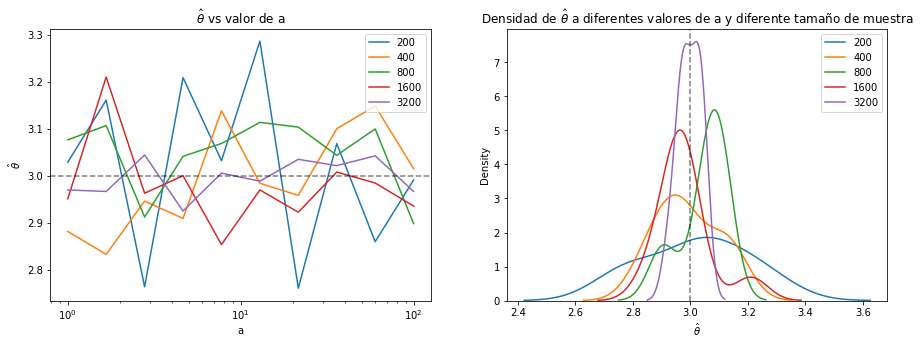

In [184]:
theta = 3
ns = [200,400,800,1600,3200]
aces = np.logspace(0,2,num=10)

def EM_exponential(a,x,m,n):
    
    s = np.sum(x)+(n-m)*a
    # Hyperparams
    tol = 1e-8 
    maxiter = 300
    i = 0
    delta = 1
    hat = np.mean(x)

    while (np.abs(delta)>tol and i < maxiter):
        hat0 = hat
        hat = (s + (n-m)*hat0)/n
        delta = hat-hat0
        i+=1
    if i==maxiter:
        print("Se alcanzó el número máximo de iteraciones.")
    print(f'θ estimado: {hat:.4f}, número de iteraciones: {i}')
    return hat

fig, ax = plt.subplots(1,2,figsize=(15,5))
for n in ns:
    theta_hat = []
    for a in aces:
        x = sc.expon.rvs(scale=theta,size=n)
        #xm = x[x<a]
        #xn = x[x>=a]
        print(x)
        censored = x>=a
        m = n-len(x[censored])
        #n = k-m
        x[censored] = a
        xm = x[np.logical_not(censored)]
        mu_xm = np.mean(xm)
        theta_hat.append(EM_exponential(a,xm,m,n))
    #sns.kdeplot(x=theta_hat)
    ax[0].plot(aces,theta_hat)
    ax[1] = sns.kdeplot(x=theta_hat)

plt.legend(ns)
plt.axvline(x=theta,linestyle='--',color='k',alpha=0.5)
plt.xlabel('$\hat{\\theta}$')
plt.title('Densidad de $\hat{\\theta}$ a diferentes valores de a y diferente tamaño de muestra')
ax[0].legend(ns)
ax[0].axhline(y=theta,linestyle='--',color='k',alpha=0.5)
ax[0].set_xscale('log')
ax[0].set_xlabel('a')
ax[0].set_ylabel('$\hat{\\theta}$')
ax[0].set_title('$\hat{\\theta}$ vs valor de a')


In [168]:
min(x)

3.0

3200